In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mingo

In [32]:
df=pd.read_csv("/Users/sudhanvasavyasachi/Desktop/Projects/Flight-Delay/data/Airline_Delay_Cause.csv")
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,...,0.0,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,0.0,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,0.0,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,0.0,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,...,0.0,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0


In [33]:
df.iloc[1]

year                                                       2023
month                                                        12
carrier                                                      9E
carrier_name                                  Endeavor Air Inc.
airport                                                     AEX
airport_name           Alexandria, LA: Alexandria International
arr_flights                                                62.0
arr_del15                                                   7.0
carrier_ct                                                 4.25
weather_ct                                                  0.0
nas_ct                                                      1.0
security_ct                                                 0.0
late_aircraft_ct                                           1.75
arr_cancelled                                               0.0
arr_diverted                                                0.0
arr_delay                               

In [34]:
df.shape

(179338, 21)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179338 entries, 0 to 179337
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 179338 non-null  int64  
 1   month                179338 non-null  int64  
 2   carrier              179338 non-null  object 
 3   carrier_name         179338 non-null  object 
 4   airport              179338 non-null  object 
 5   airport_name         179338 non-null  object 
 6   arr_flights          178997 non-null  float64
 7   arr_del15            178747 non-null  float64
 8   carrier_ct           178997 non-null  float64
 9   weather_ct           178997 non-null  float64
 10  nas_ct               178997 non-null  float64
 11  security_ct          178997 non-null  float64
 12  late_aircraft_ct     178997 non-null  float64
 13  arr_cancelled        178997 non-null  float64
 14  arr_diverted         178997 non-null  float64
 15  arr_delay        

In [36]:
df.isnull().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            341
arr_del15              591
carrier_ct             341
weather_ct             341
nas_ct                 341
security_ct            341
late_aircraft_ct       341
arr_cancelled          341
arr_diverted           341
arr_delay              341
carrier_delay          341
weather_delay          341
nas_delay              341
security_delay         341
late_aircraft_delay    341
dtype: int64

In [85]:
df.isnull().sum().sum()

5365

In [37]:
df.duplicated().sum()

0

# year

In [38]:
df['year'].value_counts()

year
2019    25858
2018    24956
2022    22964
2021    22800
2023    22621
2020    21876
2015    13528
2017    12518
2016    12217
Name: count, dtype: int64

# month

In [39]:
df['month'].value_counts()

month
1     15259
3     15220
12    15111
2     14982
6     14962
4     14913
9     14891
8     14889
11    14854
10    14842
7     14739
5     14676
Name: count, dtype: int64

# carrier

In [40]:
df['carrier'].nunique()

29

In [41]:
df['carrier'].value_counts()

carrier
OO    23821
DL    14980
MQ    11299
AA    10912
UA    10418
WN    10051
EV     8793
G4     8761
F9     8307
AS     7754
9E     7494
YV     6877
B6     6827
OH     6545
YX     6072
NK     4950
ZW     4468
PT     4160
G7     3948
C5     3430
QX     3203
HA     1952
AX     1932
CP      926
VX      821
US      434
EM      144
KS       44
9K       15
Name: count, dtype: int64

# carrier_name

In [42]:
df['carrier_name'].nunique()

39

In [43]:
df['carrier_name'].value_counts()

carrier_name
SkyWest Airlines Inc.                        23821
Envoy Air                                    11299
Delta Air Lines Network                       9677
Allegiant Air                                 8761
American Airlines Network                     7654
Endeavor Air Inc.                             7494
ExpressJet Airlines Inc.                      7348
United Air Lines Network                      7271
Southwest Airlines                            6941
Mesa Airlines Inc.                            6877
JetBlue Airways                               6827
PSA Airlines Inc.                             6545
Frontier Airlines                             6438
Republic Airline                              6072
Alaska Airlines Network                       5433
Delta Air Lines Inc.                          5303
Air Wisconsin Airlines Corp                   4468
Piedmont Airlines                             4160
GoJet Airlines LLC d/b/a United Express       3948
Spirit Airlines   

To get all cases where a single carrier code is mapped to two carrier names we shall use group by 

In [51]:
df.groupby('carrier')['carrier_name'].value_counts()

carrier  carrier_name                             
9E       Endeavor Air Inc.                             7494
9K       Cape Air                                        15
AA       American Airlines Network                     7654
         American Airlines Inc.                        3258
AS       Alaska Airlines Network                       5433
         Alaska Airlines Inc.                          2321
AX       Trans States Airlines                         1932
B6       JetBlue Airways                               6827
C5       Commutair Aka Champlain Enterprises, Inc.     2646
         CommuteAir LLC dba CommuteAir                  784
CP       Compass Airlines                               926
DL       Delta Air Lines Network                       9677
         Delta Air Lines Inc.                          5303
EM       Empire Airlines Inc.                           144
EV       ExpressJet Airlines Inc.                      7348
         ExpressJet Airlines LLC                 

In [ ]:
# all those codes having two carrier names please change them to the one which has more records
df['carrier_name'] = df.groupby('carrier')['carrier_name'].transform(lambda x: x.mode()[0])
df['carrier_name'].value_counts()

carrier_name
SkyWest Airlines Inc.                        23821
Delta Air Lines Network                      14980
Envoy Air                                    11299
American Airlines Network                    10912
United Air Lines Network                     10418
Southwest Airlines                           10051
ExpressJet Airlines Inc.                      8793
Allegiant Air                                 8761
Frontier Airlines                             8307
Alaska Airlines Network                       7754
Endeavor Air Inc.                             7494
Mesa Airlines Inc.                            6877
JetBlue Airways                               6827
PSA Airlines Inc.                             6545
Republic Airline                              6072
Spirit Airlines                               4950
Air Wisconsin Airlines Corp                   4468
Piedmont Airlines                             4160
GoJet Airlines LLC d/b/a United Express       3948
Commutair Aka Cham

In [53]:
df['carrier_name'].nunique()

29

In [54]:
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

# Airport

In [56]:
df['airport'].value_counts()

airport
CLE    1593
DTW    1580
BNA    1550
PIT    1536
IND    1533
       ... 
YNG       1
FNL       1
TKI       1
ENV       1
EFD       1
Name: count, Length: 396, dtype: int64

# Airport Name

In [57]:
df['airport_name'].value_counts()

airport_name
Cleveland, OH: Cleveland-Hopkins International           1593
Detroit, MI: Detroit Metro Wayne County                  1580
Nashville, TN: Nashville International                   1550
Pittsburgh, PA: Pittsburgh International                 1536
Indianapolis, IN: Indianapolis International             1533
                                                         ... 
Fort Collins/Loveland, CO: Northern Colorado Regional       1
Mobile, AL: Mobile International                            1
Tokeen, AK: Tokeen Airport                                  1
Wendover, UT: Wendover Airport                              1
Houston, TX: Ellington                                      1
Name: count, Length: 420, dtype: int64

again I can see airport code and airport name the unique counts are not matching so we will perform the same step as earlier

In [ ]:
# show me those airports which have more than one airport name and the names of the "airport_name"
df.groupby('airport')['airport_name'].nunique().reset_index().query('airport_name > 1')


,airport,airport_name
35,BFM,2
45,BLV,2
83,CNY,2
89,CRW,2
144,GCC,2
176,HYA,2
192,ITH,2
207,LAS,2
238,MFE,2
242,MHT,2


In [71]:
df[df['airport']=='BFM']['airport_name'].unique()

array(['Mobile, AL: Mobile Downtown', 'Mobile, AL: Mobile International'],
      dtype=object)

these both refer to the same airport and it is just a name change that happened in between these years

In [ ]:
# change the airport name to the one which has more records
df['airport_name'] = df.groupby('airport')['airport_name'].transform(lambda x: x.mode()[0])
df['airport_name'].nunique()

396

In [73]:
df['airport_name'].value_counts()

airport_name
Cleveland, OH: Cleveland-Hopkins International           1593
Detroit, MI: Detroit Metro Wayne County                  1580
Nashville, TN: Nashville International                   1550
Pittsburgh, PA: Pittsburgh International                 1536
Indianapolis, IN: Indianapolis International             1533
                                                         ... 
Youngstown/Warren, OH: Youngstown-Warren Regional           1
Fort Collins/Loveland, CO: Northern Colorado Regional       1
Tokeen, AK: Tokeen Airport                                  1
Wendover, UT: Wendover Airport                              1
Houston, TX: Ellington                                      1
Name: count, Length: 396, dtype: int64

# Arrival Flights

Count of Flights of the 'carrier_company' Arrived at 'airport'

In [75]:
df['arr_flights'].describe()

count    178997.000000
mean        327.816969
std         931.001446
min           1.000000
25%          41.000000
50%          89.000000
75%         218.000000
max       21977.000000
Name: arr_flights, dtype: float64

In [76]:
df['arr_flights'].isnull().sum()

341

In [80]:
df[df['arr_flights'].isnull()].index

Index([   779,   1254,   1423,   1470,   2278,   2311,   5472,   7901,   7914,
         7929,
       ...
       167251, 167286, 169446, 169447, 174649, 176127, 176350, 176725, 176825,
       178668],
      dtype='int64', length=341)

# Arr_del15

Number of arrival Flights that were delayed by 15 minutes or more

In [82]:
df['arr_del15'].describe()

count    178747.000000
mean         58.709086
std         164.378035
min           0.000000
25%           6.000000
50%          15.000000
75%          40.000000
max        4176.000000
Name: arr_del15, dtype: float64

In [ ]:
print(df['arr_del15'].isnull().sum())
print(df[df['arr_del15'].isnull()].index)

591
Index([   779,   1254,   1423,   1470,   2278,   2311,   5472,   7901,   7914,
         7929,
       ...
       169446, 169447, 174649, 176127, 176350, 176507, 176725, 176825, 178668,
       179059],
      dtype='int64', length=591)


# Carrier_ct

A carrier delay refers to a delay caused by the airline itself due to issues under its direct control.

It includes problems like:
-	Late crew arrival or crew unavailability
-	Aircraft maintenance or servicing
-	Late baggage loading
-	Gate congestion caused by airline scheduling
-	Internal airline mismanagement


In [88]:
df['carrier_ct'].describe()

count    178997.000000
mean         18.572643
std          47.389651
min           0.000000
25%           1.960000
50%           5.400000
75%          14.700000
max        1293.910000
Name: carrier_ct, dtype: float64

In [90]:
df['carrier_ct'].isnull().sum()

341

In [92]:
df[df['carrier_ct'].isnull()].index

Index([   779,   1254,   1423,   1470,   2278,   2311,   5472,   7901,   7914,
         7929,
       ...
       167251, 167286, 169446, 169447, 174649, 176127, 176350, 176725, 176825,
       178668],
      dtype='int64', length=341)

# Wheather Count

Number of delays caused by bad wheather 

In [89]:
df['weather_ct'].describe()

count    178997.000000
mean          2.035742
std           6.894812
min           0.000000
25%           0.000000
50%           0.220000
75%           1.620000
max         266.420000
Name: weather_ct, dtype: float64

In [93]:
df['weather_ct'].isnull().sum()

341

In [94]:
df[df['weather_ct'].isnull()].index

Index([   779,   1254,   1423,   1470,   2278,   2311,   5472,   7901,   7914,
         7929,
       ...
       167251, 167286, 169446, 169447, 174649, 176127, 176350, 176725, 176825,
       178668],
      dtype='int64', length=341)

# NAS Count

NAS stands for the National Airspace System.

This includes:
-	Air Traffic Control (ATC)
-	Airport facilities
-	Navigation systems
-	Airspace structure
-	En route traffic management

So, a NAS delay is caused by air traffic management issues that are not the airline’s fault.

![Screenshot 2025-06-10 at 6.58.34 PM.png](<attachment:Screenshot 2025-06-10 at 6.58.34 PM.png>)
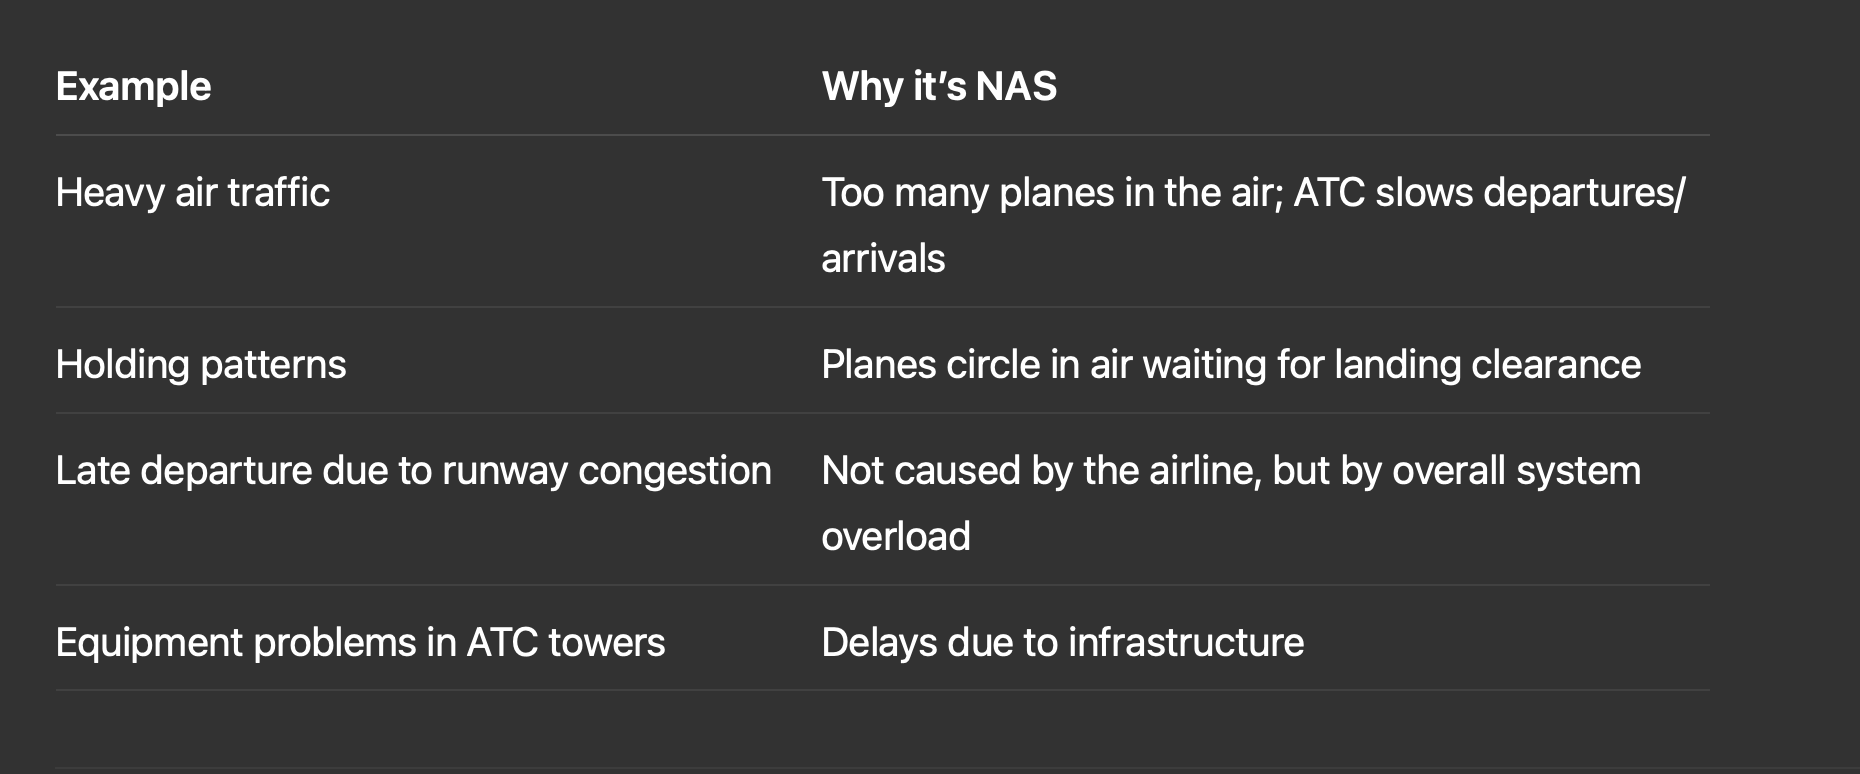

In [95]:
df['nas_ct'].describe()

count    178997.000000
mean         17.094929
std          56.279604
min           0.000000
25%           1.000000
50%           3.300000
75%           9.860000
max        1884.420000
Name: nas_ct, dtype: float64

In [97]:
print(df['weather_ct'].isnull().sum())
print(df[df['weather_ct'].isnull()].index)

341
Index([   779,   1254,   1423,   1470,   2278,   2311,   5472,   7901,   7914,
         7929,
       ...
       167251, 167286, 169446, 169447, 174649, 176127, 176350, 176725, 176825,
       178668],
      dtype='int64', length=341)


# Security Count

Security delays refer to delays caused by airport security measures or breaches that impact the flight’s departure or arrival.

These are not under the airline’s control — they result from TSA (or equivalent agencies), airport authorities, or national-level security alerts.

In [98]:
df['security_ct'].describe()

count    178997.000000
mean          0.145307
std           0.702149
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          58.690000
Name: security_ct, dtype: float64

In [99]:
print(df['security_ct'].isnull().sum())
print(df[df['security_ct'].isnull()].index)

341
Index([   779,   1254,   1423,   1470,   2278,   2311,   5472,   7901,   7914,
         7929,
       ...
       167251, 167286, 169446, 169447, 174649, 176127, 176350, 176725, 176825,
       178668],
      dtype='int64', length=341)


# Late Aircraft Delay Count

A late aircraft delay occurs when the incoming flight arrives late, causing the next flight using that same aircraft to be delayed as well.

This typically happens in hub-and-spoke systems where planes are reused for multiple legs (e.g., JFK → ATL → MIA).

In [100]:
df['late_aircraft_ct'].describe()

count    178997.000000
mean         20.778477
std          64.912766
min           0.000000
25%           1.000000
50%           4.290000
75%          13.010000
max        2069.070000
Name: late_aircraft_ct, dtype: float64

# Aircraft Cancelled Count

In [102]:
df['arr_cancelled'].describe()

count    178997.000000
mean          6.830103
std          41.446756
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max        4951.000000
Name: arr_cancelled, dtype: float64

# Aircrafts Diverted Count

In [106]:
df['arr_diverted'].describe()

count    178997.000000
mean          0.779572
std           3.490499
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         160.000000
Name: arr_diverted, dtype: float64

# Aircraft Delay

In [107]:
df['arr_delay'].describe()

count    178997.000000
mean       3863.310676
std       11902.153241
min           0.000000
25%         288.000000
50%         900.000000
75%        2547.000000
max      438783.000000
Name: arr_delay, dtype: float64

# All delay counts in minutes

In [108]:
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [110]:
df[['carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay']].describe()

,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000
mean,1325.546199,209.113426,819.949284,6.839941,1501.854875
std,4067.786987,791.817638,3178.603458,40.440497,4878.178427
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91.000000,0.000000,28.000000,0.000000,54.000000
50%,321.000000,12.000000,124.000000,0.000000,286.000000
75%,986.000000,131.000000,401.000000,0.000000,964.000000
max,196944.000000,31960.000000,112018.000000,3760.000000,227959.000000


# Null Values

Seeing the null value indexes they all seem to be present in the same rows so it is necessary to analyse it before train test split

In [118]:
# all the indices where atleat one column has null value
null_indices = df[df[['carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay']].isnull().any(axis=1)].index
print(null_indices)
# show me the rows where at least one of the columns has null value
null_rows = df.loc[null_indices]
null_rows

Index([   779,   1254,   1423,   1470,   2278,   2311,   5472,   7901,   7914,
         7929,
       ...
       167251, 167286, 169446, 169447, 174649, 176127, 176350, 176725, 176825,
       178668],
      dtype='int64', length=341)


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
779,2023,12,UA,United Air Lines Network,BHM,"Birmingham, AL: Birmingham-Shuttlesworth Inter...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1254,2023,12,G7,GoJet Airlines LLC d/b/a United Express,SBN,"South Bend, IN: South Bend International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1423,2023,12,YV,Mesa Airlines Inc.,ROA,"Roanoke, VA: Roanoke Blacksburg Regional Woodr...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1470,2023,12,YX,Republic Airline,ICT,"Wichita, KS: Wichita Dwight D Eisenhower National",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2278,2023,11,C5,"Commutair Aka Champlain Enterprises, Inc.",BTV,"Burlington, VT: Burlington International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176127,2015,3,DL,Delta Air Lines Network,PHF,"Newport News/Williamsburg, VA: Newport News/Wi...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176350,2015,3,EV,ExpressJet Airlines Inc.,BGR,"Bangor, ME: Bangor International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176725,2015,3,OO,SkyWest Airlines Inc.,EWR,"Newark, NJ: Newark Liberty International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176825,2015,3,UA,United Air Lines Network,STL,"St. Louis, MO: St Louis Lambert International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

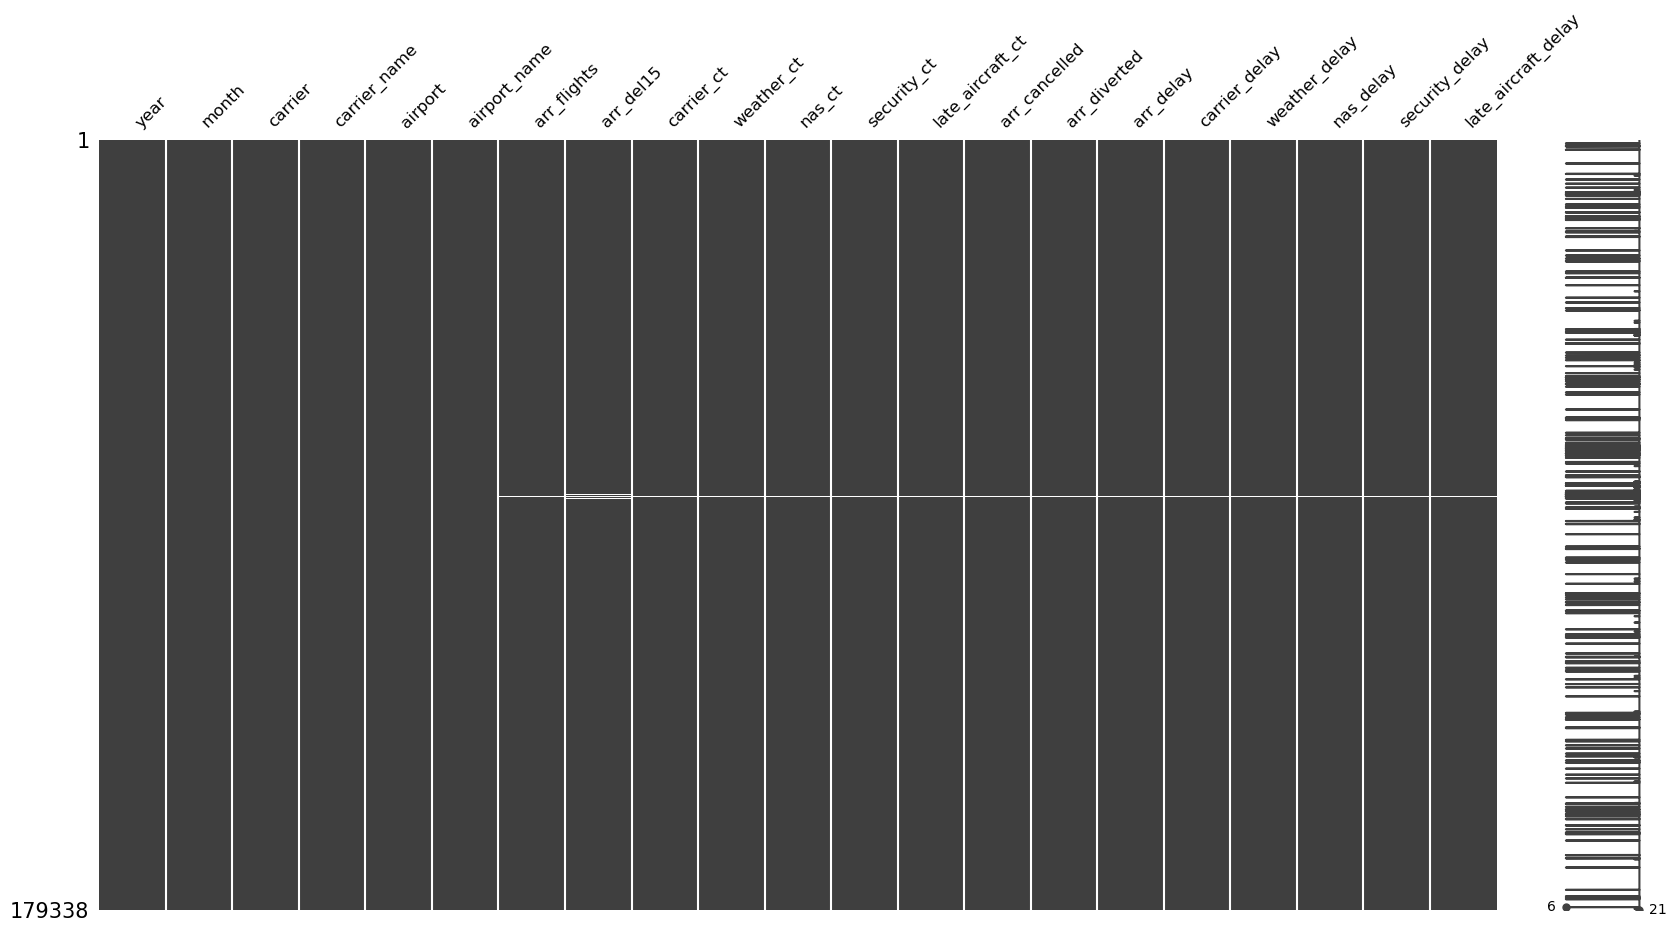

In [125]:
# use missingno library to visualize the missing values
mingo.matrix(df, figsize=(20, 10), fontsize=12)

<Axes: >

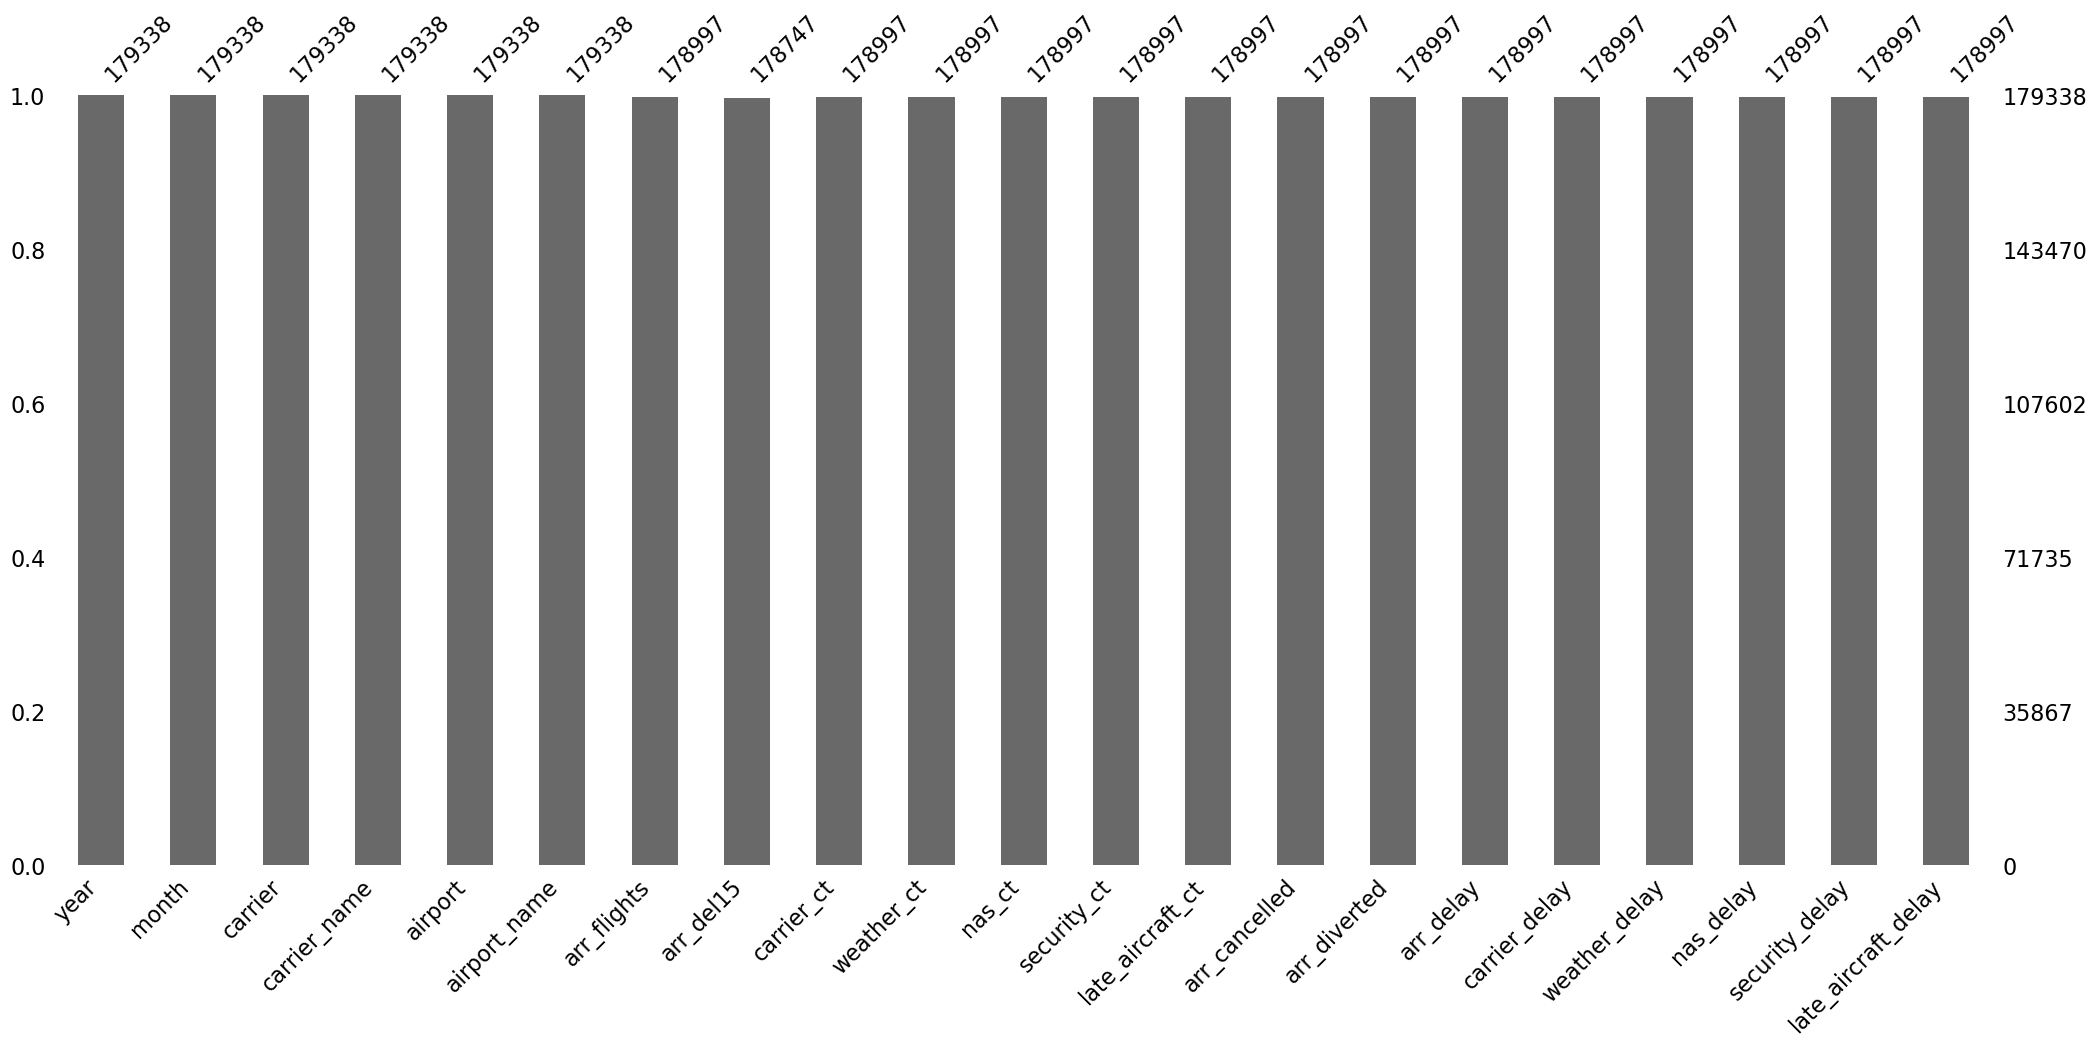

In [123]:
mingo.bar(df)

<Axes: >

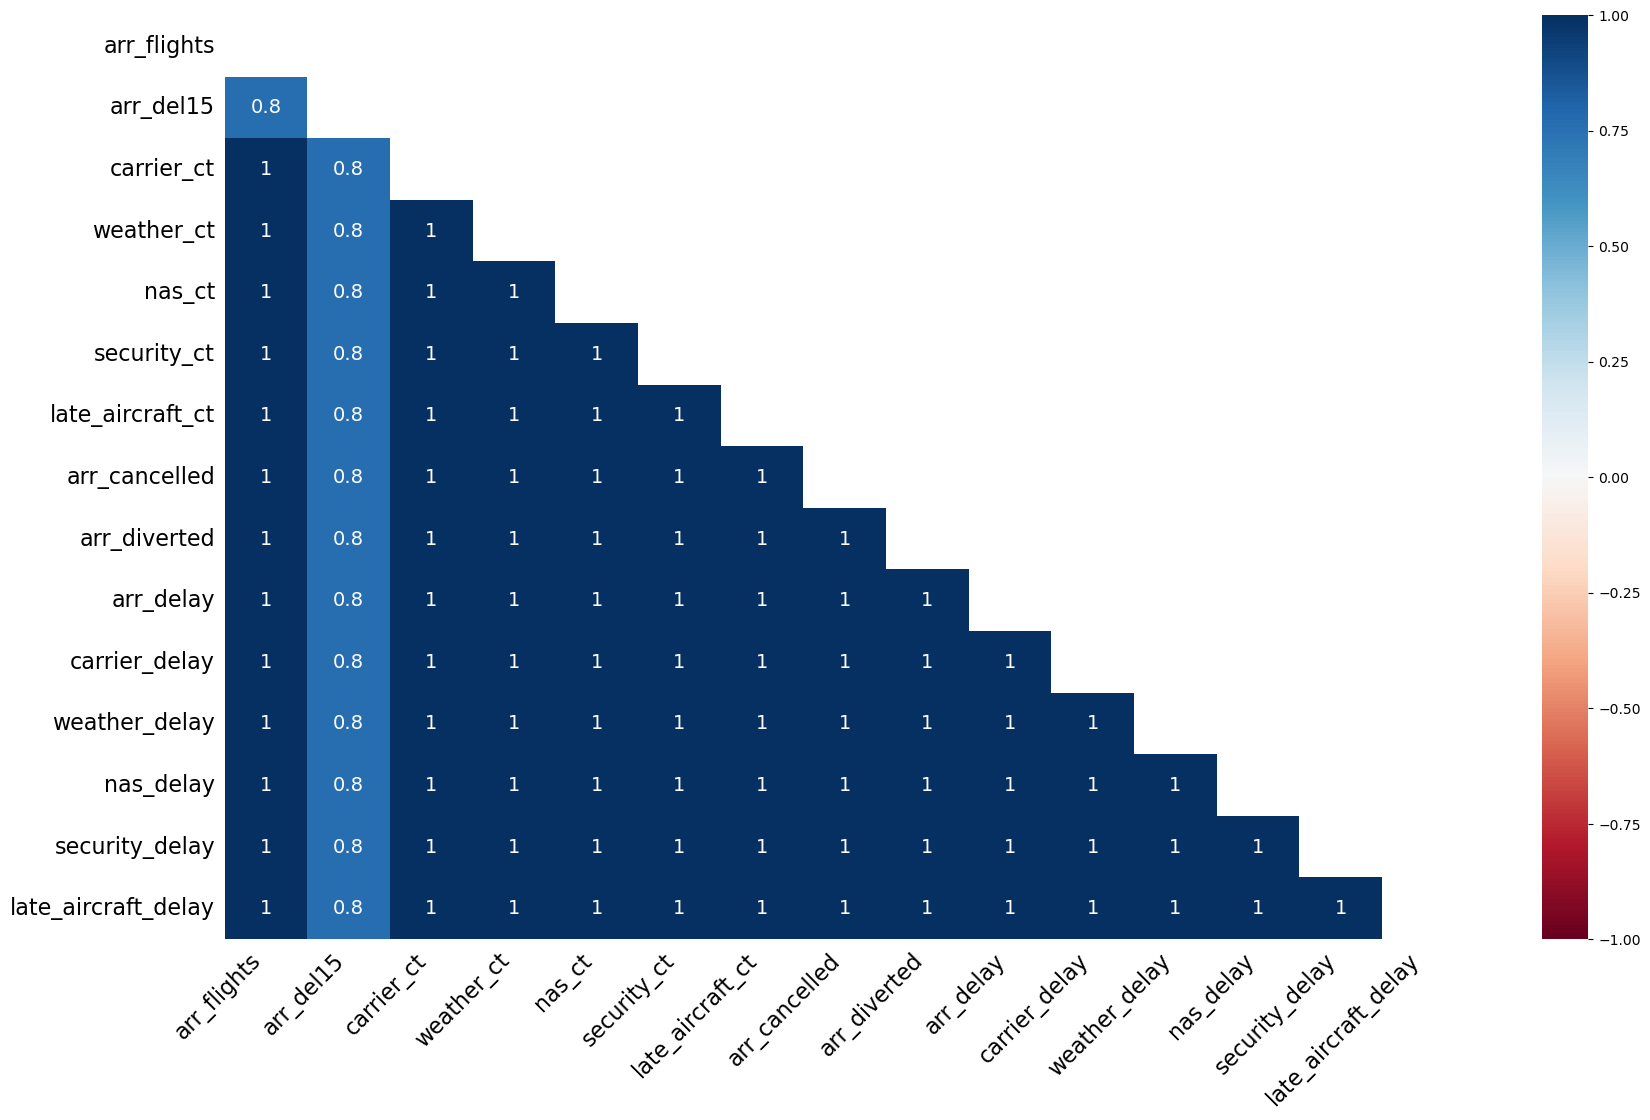

In [122]:
mingo.heatmap(df)

we can clearly see that the missing values are 100 percent correlated for all columns except arr_del15 column which we have seen in the missingno plot that it has some extra missing values

In [127]:
df.isna().sum().sum()

5365

5k rows is just constituting 2.85 percent of the data points. Since it is below 5 percent we will remove the null values from the data set to perform smooth eda and modelling

In [129]:
df.dropna(inplace=True)

In [130]:
df.shape

(178747, 21)

In [134]:
df.to_csv("../data/cleaned_data.csv",index=False)